<a href="https://colab.research.google.com/github/AmirRezaEskandarani/English_handwritten_digits_recognition/blob/main/English_handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognize English digits from 0 to 9

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

### load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### show some of the images

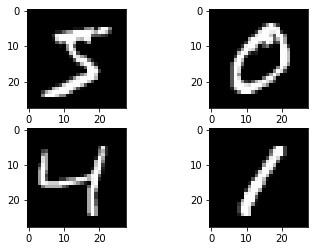

In [ ]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### reshape to be [samples][width][height][channels]

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

### normalize inputs from 0-255 to 0-1


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

###  one hot encode outputs and get number fo classes

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

### define and compile the model

In [ ]:
def cnn_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = cnn_model()

### Fit the model


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 10s 6ms/step - loss: 0.3695 - accuracy: 0.8895 - val_loss: 0.0878 - val_accuracy: 0.9725
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.0597 - val_accuracy: 0.9808
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0364 - val_accuracy: 0.9868
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0317 - val_accuracy: 0.9883
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch

### calculate loss and accuray of the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'loss for the model is {loss} \naccuracy for the model is {accuracy}')

loss for the model is 0.02571837417781353 
accuracy for the model is 0.9911999702453613


### plot training and validation accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### download sample for the Internet and predict it

In [ ]:
import os
import tensorflow as tf
import numpy as np

image_url = 'https://i.stack.imgur.com/qg0H2.png'
                      
image_url = tf.keras.utils.get_file('Court', origin=image_url )
img = tf.keras.preprocessing.image.load_img(image_url, target_size=(28, 28) )
os.remove(image_url) # Remove the cached file
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0 
img_array = img_array[:,:,0]
img_array = img_array.reshape(1, 28, 28 )
prediction = model.predict(img_array)

print(f'This number probably is {np.argmax(prediction)} .')


1/1 [==============================] - 0s 115ms/step
This number probably is 8 .


### show the downloaded image

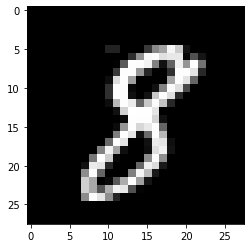

In [ ]:
plt.imshow(img, cmap='gray')